In [2]:
!pip install seaborn
!pip install matplotlib
!pip install datetime
!pip install pandas
!pip install --upgrade pandas_datareader
!pip install numpy
!pip install os
!pip install tensorflow 

import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import pandas_datareader as web # to read data from web
import numpy as np
import os
import tensorflow as tf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 617 kB/s 
     |████████████████████████████████| 254 kB 10.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/si

In [25]:
# Import stock data using pandas_datareader from Yahoo Finance
user_data = input('Please enter a stock ticker: ')
data = web.DataReader(user_data,data_source="yahoo",start='2014-01-01',end='2022-11-25')
data.head()

Please enter a stock ticker: txn


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,43.500000,42.880001,43.439999,43.099998,6959200.0,33.988426
2014-01-03,43.459999,42.970001,43.119999,43.290001,4693300.0,34.138245
2014-01-06,43.279999,42.849998,43.250000,42.930000,4446300.0,33.854374
2014-01-07,43.110001,42.639999,42.980000,42.700001,5078900.0,33.672985
2014-01-08,43.320000,42.619999,42.959999,43.290001,6353500.0,34.138245


In [26]:
data.shape

(2242, 6)

Text(0.5, 1.0, 'Closing price History')

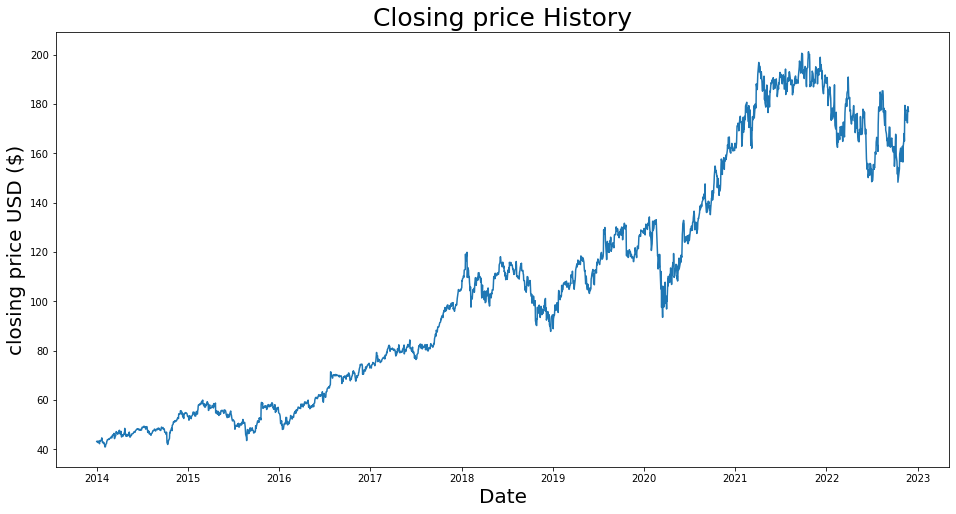

In [27]:
#lets look at the stock closing price of history
import seaborn as sns
plt.figure(figsize=(16,8))
sns.lineplot(x= data.index,y=data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('closing price USD ($)',fontsize=20)
plt.title('Closing price History',fontsize=25)

In [28]:
# Split into train and test:
data_to_train = data[:1530]
data_to_test = data[1530:]


In [29]:
# Save the resulting data to csv files
data_to_train.to_csv('train_data.csv')
data_to_test.to_csv('test_data.csv')


In [30]:
stock_data = data.iloc[: , 3:4]
stock_data.head()

,Close
Date,
2014-01-02,43.099998
2014-01-03,43.290001
2014-01-06,42.930000
2014-01-07,42.700001
2014-01-08,43.290001


In [33]:
## Create NumPy array
training_dataset= stock_data.iloc[:1530,:].values

test_dataset= stock_data.iloc[1530:,:].values

# Normalize our data
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
scaled_training_dataset= sc.fit_transform(training_dataset)

# Create a data structure with 60 timesteps and 1 output
X_train=[] #Independent variables
y_train= [] # Dependent variables 
# I am going to append past 60 days data 
for i in range(60,1530):
    X_train.append(scaled_training_dataset[i-60:i,0]) # Appending prevois 60 days data not including 60
    y_train.append(scaled_training_dataset[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [34]:
# lETS CHECK THE SHAPE OF X_train and y_train
X_train.shape, y_train.shape

((1470, 60), (1470,))

In [35]:
# LSMT Model needs to be 3- dimensional, so need to rehsape the x_train, y_train
# Reshaping
#numpy.reshape(array, shape, order = 'C')
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1470, 60, 1)

In [36]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialising the RNN
model= Sequential()

# Adding first LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.2))

# Adding second LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding third LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fourth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(rate=0.2))

# Adding fifth LSTM layer and some dropout Dropout regularisation
model.add(LSTM(units=100))
model.add(Dropout(rate=0.2))

# Adding the Output Layer
model.add(Dense(units=1))

# Compiling the Model
# Because we're doing regression hence mean_squared_error
model.compile(loss='mean_squared_error', optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 100)           8

Note the LSMT model takes 3 arguments: #values, #time-steps, #1-dimensional output

In [47]:
# Fitting the model to the Training set
history=model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
46/46 [==============================] - 14s 302ms/step - loss: 0.0019
Epoch 2/100
46/46 [==============================] - 13s 278ms/step - loss: 0.0016
Epoch 3/100
46/46 [==============================] - 13s 281ms/step - loss: 0.0014
Epoch 4/100
46/46 [==============================] - 13s 281ms/step - loss: 0.0015
Epoch 5/100
46/46 [==============================] - 13s 279ms/step - loss: 0.0017
Epoch 6/100
46/46 [==============================] - 13s 287ms/step - loss: 0.0019
Epoch 7/100
46/46 [==============================] - 13s 284ms/step - loss: 0.0015
Epoch 8/100
46/46 [==============================] - 14s 309ms/step - loss: 0.0014
Epoch 9/100
46/46 [==============================] - 13s 278ms/step - loss: 0.0016
Epoch 10/100
46/46 [==============================] - 13s 277ms/step - loss: 0.0014
Epoch 11/100
46/46 [==============================] - 13s 279ms/step - loss: 0.0016
Epoch 12/100
46/46 [==============================] - 13s 280ms/step - loss: 0.0015
E

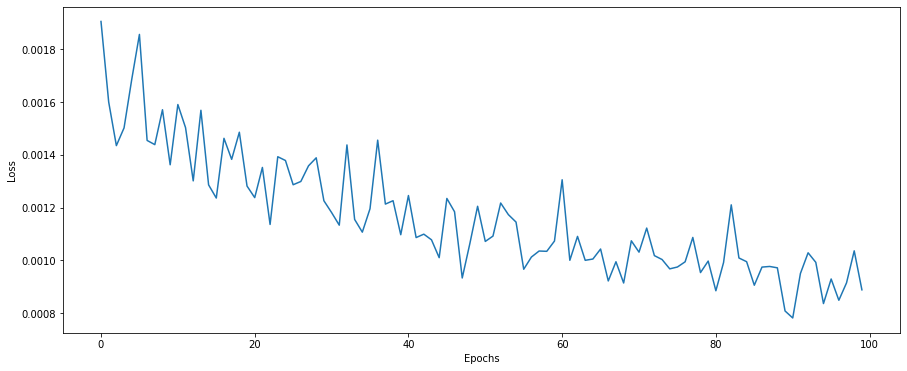

In [50]:
plt.figure(figsize = (15, 6))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [57]:
#GEtting ready both train and est data set
train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [58]:
real_stock_price = test_data.iloc[:, 3:4].values

In [59]:
real_stock_price.shape

(712, 1)

In [61]:
test_dataset.shape

(712, 7)

In [67]:
# Hence we will concatenate the dataset and then scale them
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 230):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [68]:
inputs.shape

(772, 1)

In [69]:
data_total.shape

(2242,)

In [70]:
X_test.shape

(170, 60, 1)

6/6 [==============================] - 1s 83ms/step


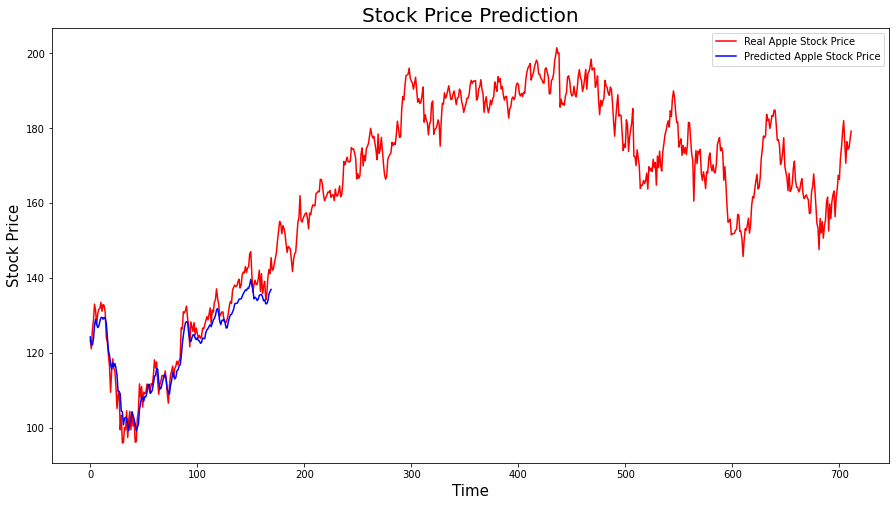

In [88]:
#preict the model
predicted_stock_price = model.predict(X_test)

# Inverse the scaling
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Apple Stock Price')
plt.title('Stock Price Prediction',fontsize=20)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.legend()
plt.show()

TypeError: ignored

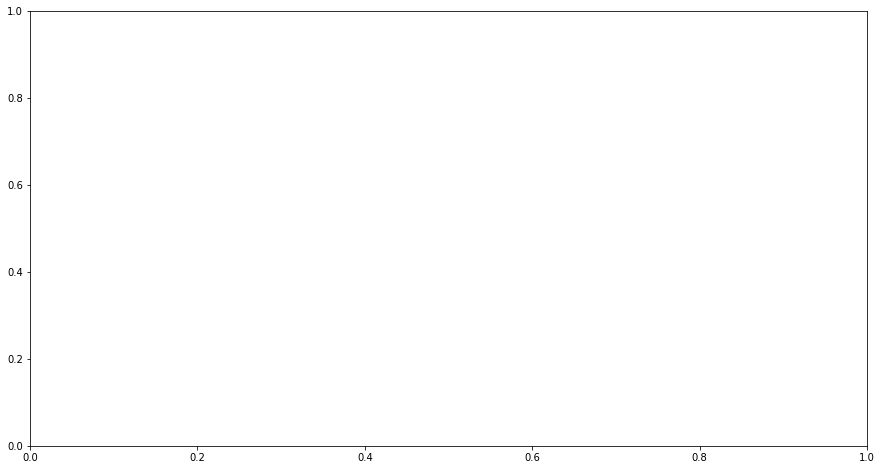

In [89]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(test_dataset, color='Red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()